imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D
import string
import plotly.graph_objects as go

In [3]:
file = open('distance_color_type_for_all_stars.txt', 'r')
file_csv = open('distance_color_type_for_all_stars_csv.csv', 'w')

header = [
    'ASASSN_id', 'distance', 'distance_low', 'distance_high', 'g_mag', 'Gaia_name', 'G_mag', 'G_mag_err',
    'abs_mag_G', 'abs_mag_G_low', 'abs_mag_G_high', 'ext_correct_G', 'ext_correct_G_low', 'ext_correct_G_high',
    'BP_RP', 'BP_RP_err', 'BP_RP_0', 'BP_RP_0_err', 'J_mag', 'J_mag_err', 'K_mag', 'K_mag_err',
    'abs_mag_J', 'abs_mag_J_low', 'abs_mag_J_high', 'ext_correct_J', 'ext_correct_J_low', 'ext_correct_J_high',
    'ext_correct_K', 'ext_correct_K_low', 'ext_correct_K_high', 'FinalType', 'ML_classifier_type',
    'visual_classification_type', 'VSX_type', 'VSX_RA', 'VSX_Dec', 'VSX_name'
]

file_csv.write(','.join(header) + '\n')

lines = file.readlines()
for line in lines:
    line_split = line.split()
    
    # Remove the first 'ASASSN' entry
    if line_split[0] == 'ASASSN':
        line_split = line_split[1:]
    
    cleaned_data = []
    for item in line_split:
        if '=' in item:
            continue  # Skip items with '='
        cleaned_data.append(item)
    
    # Combine Gaia_name into a single string
    gaia_start = 5  # Adjusted index where Gaia_name starts after removing 'ASASSN'
    gaia_end = 8    # Adjusted index where Gaia_name ends
    gaia_name = ' '.join(cleaned_data[gaia_start:gaia_end])
    cleaned_data = cleaned_data[:gaia_start] + [gaia_name] + cleaned_data[gaia_end:]
    
    # Combine VSX_name into a single string
    vsx_name_start = 37  # Adjusted index where VSX_name starts
    vsx_name = ' '.join(cleaned_data[vsx_name_start:])
    cleaned_data = cleaned_data[:vsx_name_start] + [vsx_name]

    all_letters = set(string.ascii_letters)
    if any(letter in all_letters for letter in cleaned_data[35]):
        continue
    
    file_csv.write(','.join(cleaned_data) + '\n')

file.close()
file_csv.close()


In [4]:
color_csv = pd.read_csv('distance_color_type_for_all_stars_csv.csv')

In [5]:
color_csv["FinalType"].unique()

array(['RRAB', 'RRC', 'RR(B)', 'CONSTANT', 'POSSIBLY', "I'D", 'EB', 'EW',
       'BY', 'EA', 'SRA', 'CONST', 'SXPHE', 'RS', 'L', 'SRB', 'NEED',
       'GDOR:', 'DSCT', 'BY:', 'INS', 'GDOR', 'CEP:', 'SR', 'SRD', 'NO',
       'DCEP', 'CWA:', 'CEP', 'CEPH', 'COSNTANT', 'RS:', 'BAD', 'YSO'],
      dtype=object)

In [6]:
exclude_distance_99999 = color_csv[color_csv["distance"] < 99998]
exclude_distance_99999

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And
1,661428773073,5833,4946,7076,13.951,Gaia DR3 2774083440496341504,15.181,0.017,1.279,1.637,...,0.009,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.01669,18.40698,CSS_J000004.0+182425
2,128850052915,5463,4555,6859,16.166,Gaia DR3 2875434876156537472,15.869,0.017,2.037,2.432,...,0.019,0.019,0.019,RRAB,RRL_ab,NaN,RRAB,0.03171,34.67397,SERIV 27
3,661427539170,10226,8430,12243,14.876,Gaia DR3 4689677784096252160,15.459,0.017,0.337,0.757,...,0.009,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.06821,-72.77875,BP Tuc
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0
25393,601296002455,7238,6247,9348,15.362,Gaia DR3 2333314689487138944,14.879,0.009,0.581,0.901,...,0.000,0.000,0.000,RRC,DSCT,RRC,RRC,359.93862,-28.19131,SSS_J235945.0-281126
25394,644246075250,9021,7142,11992,16.569,Gaia DR3 6494193484463108608,15.834,0.014,1.029,1.536,...,0.004,0.004,0.004,RRAB,NonVar,RRAB,RRAB,359.94269,-60.26738,ASASSN-V J235946.37-601602.6


In [7]:
K_mag_clean_1 = exclude_distance_99999[(exclude_distance_99999["K_mag"] != 99.999)]
K_mag_clean_2 = K_mag_clean_1[K_mag_clean_1["K_mag"] > 1]

K_mag_clean_2

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And
1,661428773073,5833,4946,7076,13.951,Gaia DR3 2774083440496341504,15.181,0.017,1.279,1.637,...,0.009,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.01669,18.40698,CSS_J000004.0+182425
2,128850052915,5463,4555,6859,16.166,Gaia DR3 2875434876156537472,15.869,0.017,2.037,2.432,...,0.019,0.019,0.019,RRAB,RRL_ab,NaN,RRAB,0.03171,34.67397,SERIV 27
3,661427539170,10226,8430,12243,14.876,Gaia DR3 4689677784096252160,15.459,0.017,0.337,0.757,...,0.009,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.06821,-72.77875,BP Tuc
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0
25393,601296002455,7238,6247,9348,15.362,Gaia DR3 2333314689487138944,14.879,0.009,0.581,0.901,...,0.000,0.000,0.000,RRC,DSCT,RRC,RRC,359.93862,-28.19131,SSS_J235945.0-281126
25394,644246075250,9021,7142,11992,16.569,Gaia DR3 6494193484463108608,15.834,0.014,1.029,1.536,...,0.004,0.004,0.004,RRAB,NonVar,RRAB,RRAB,359.94269,-60.26738,ASASSN-V J235946.37-601602.6


In [8]:
K_mag_clean_2[K_mag_clean_2["J_mag"] < 5]

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name
2432,360777491963,853,826,877,10.704,Gaia DR3 3100025038262435584,8.033,0.005,-2.203,-2.133,...,0.074,0.074,0.074,L,LPV_SRV_AGB_O,L,MISC|RRAB,99.81979,-7.12675,ASAS J063917-0707.6
2448,352187614364,803,790,816,10.643,Gaia DR3 5557392878766375936,8.010,0.003,-1.719,-1.682,...,0.026,0.026,0.026,SR,NonVar,SR,MISC|RRAB,100.23125,-42.60208,ASAS J064056-4236.1
3229,326418362574,1824,1646,2016,13.098,Gaia DR3 5698365800058534656,9.445,0.006,-2.030,-1.807,...,0.022,0.022,0.022,SR,LPV_SRV_AGB_C,SR,MISC|RRAB|DCEP-FO,120.75500,-24.69261,ASAS J080301-2441.5
3252,403727859610,1727,1636,1839,10.591,Gaia DR3 5721052813742839936,7.454,0.006,-3.732,-3.615,...,0.000,0.000,0.000,NEED,NonVar,need,MISC|RRAB,121.34938,-17.10303,ASAS J080524-1706.2
3274,515396669551,843,828,859,10.268,Gaia DR3 5289719349966257792,7.809,0.004,-2.250,-2.207,...,0.055,0.055,0.056,NEED,NonVar,need,MISC|RRAB|DCEP-FO|ESD|ED,121.69021,-61.69261,ASAS J080646-6141.6
3379,644245156306,892,873,913,9.943,Gaia DR3 5693027533667532288,7.727,0.003,-2.025,-1.978,...,0.000,0.000,0.000,NEED,NonVar,need,MISC|RRAB|DCEP-FO|EC|ESD,124.01675,-27.98483,ASAS J081604-2759.1
3399,644245174372,814,797,829,9.932,Gaia DR3 5693409162974127232,7.654,0.003,-1.972,-1.926,...,0.009,0.009,0.009,NEED,NonVar,need,MISC|RRAB|ESD|ED,124.50063,-27.57769,ASAS J081800-2734.7


In [9]:
K_mag_clean_2["J_minus_K"] = K_mag_clean_2["J_mag"] - K_mag_clean_2["K_mag"]

clean_final = K_mag_clean_2[K_mag_clean_2["J_minus_K"] > -1]
clean_final

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
1,661428773073,5833,4946,7076,13.951,Gaia DR3 2774083440496341504,15.181,0.017,1.279,1.637,...,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.01669,18.40698,CSS_J000004.0+182425,0.391
2,128850052915,5463,4555,6859,16.166,Gaia DR3 2875434876156537472,15.869,0.017,2.037,2.432,...,0.019,0.019,RRAB,RRL_ab,NaN,RRAB,0.03171,34.67397,SERIV 27,0.233
3,661427539170,10226,8430,12243,14.876,Gaia DR3 4689677784096252160,15.459,0.017,0.337,0.757,...,0.009,0.009,RRAB,RRL_ab,NaN,RRAB,0.06821,-72.77875,BP Tuc,0.380
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192
25393,601296002455,7238,6247,9348,15.362,Gaia DR3 2333314689487138944,14.879,0.009,0.581,0.901,...,0.000,0.000,RRC,DSCT,RRC,RRC,359.93862,-28.19131,SSS_J235945.0-281126,0.259
25394,644246075250,9021,7142,11992,16.569,Gaia DR3 6494193484463108608,15.834,0.014,1.029,1.536,...,0.004,0.004,RRAB,NonVar,RRAB,RRAB,359.94269,-60.26738,ASASSN-V J235946.37-601602.6,0.213


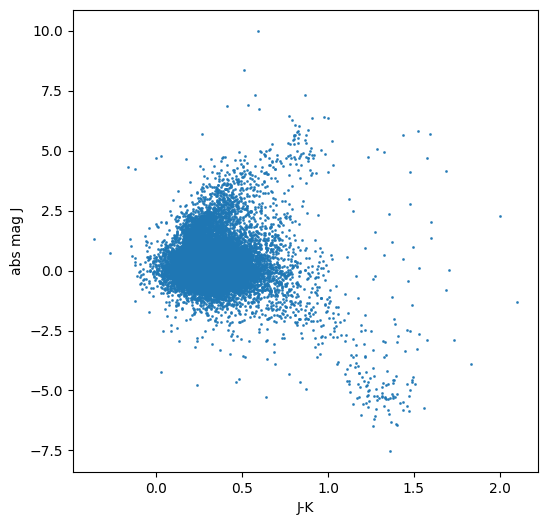

In [10]:
plt.figure(figsize=(6, 6))

plt.scatter(clean_final["J_mag"] - clean_final["K_mag"], clean_final["abs_mag_J"], marker='o', s=1, alpha = 0.85)
plt.xlabel("J-K")
plt.ylabel("abs mag J")
plt.show()

In [11]:
eclipsing = clean_final[(clean_final["ML_classifier_type"] == "EB_ED") | (clean_final["ML_classifier_type"] == "EB_EC") | (clean_final["ML_classifier_type"] == "EB_ESD")]
eclipsing

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
26,154619831684,788,780,796,14.048,Gaia DR3 4685155217893405824,13.727,0.003,4.139,4.162,...,0.013,0.013,CONSTANT,EB_ED,constant,RR:,0.97629,-75.83206,NSV 8,0.323
70,549756977370,745,733,757,11.637,Gaia DR3 2335666854095904896,11.383,0.003,2.022,2.057,...,0.000,0.000,RRC,EB_ED,RRC,RRC,2.61108,-24.96700,ASASSN-V J001026.66-245801.2,0.246
73,180388861098,905,884,925,12.140,Gaia DR3 2848533846713833088,11.970,0.003,1.993,2.044,...,0.025,0.025,EW,EB_EC,EW,EC|RRC,2.80154,22.23589,ASAS J001113+2214.2,0.230
76,214748600537,335,334,338,9.829,Gaia DR3 2798428345921128832,9.775,0.003,2.102,2.108,...,0.006,0.006,RRC,EB_ED,RRC,RRC|EC,2.87817,19.66019,ASAS J001131+1939.6,0.239
80,388378,1023,1008,1042,14.890,Gaia DR3 431881574626356992,14.291,0.004,3.104,3.136,...,0.146,0.146,EW,EB_ESD,EW,RRC,3.22345,64.30151,WISE J001253.6+641805,0.554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25275,661428869046,5401,4931,6137,13.205,Gaia DR3 1922070230865939712,14.422,0.008,0.421,0.618,...,0.043,0.043,RRAB,EB_ESD,RRAB,RRAB/BL,356.37149,41.31223,CSS_J234529.1+411844,0.310
25294,60130144089,2815,2705,2931,13.475,Gaia DR3 2011763579102380800,12.827,0.003,-3.295,-3.209,...,0.496,0.500,RRC,EB_EC,RRC,RRC,357.20726,60.47946,ASASSN-V J234849.74+602846.1,0.343
25348,137440314659,3049,2890,3227,14.582,Gaia DR3 1993561335903168768,14.382,0.008,1.549,1.666,...,0.053,0.053,EW,EB_EC,EW,RRC,358.70001,53.99216,ASASSN-V J235448.00+535931.8,0.318
25362,85900846962,6174,5395,7769,15.276,Gaia DR3 1939908226485813504,15.227,0.009,0.838,1.131,...,0.056,0.056,RRAB,EB_ESD,RRAB,RRAB/BL,359.17987,49.15463,1SWASP J235643.15+490916.8,0.487


In [12]:
clean_final["distance_high"]

0         4082
1         7076
2         6859
3        12243
4         4440
         ...  
25391     4813
25392     4843
25393     9348
25394    11992
25395     6654
Name: distance_high, Length: 22799, dtype: int64

In [13]:
errors = clean_final[((clean_final["distance_high"] - clean_final["distance_low"]) / clean_final["distance"]) < 0.3].copy()
errors

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,0.012,0.012,RRAB,RRL_ab,NaN,RRAB,0.14829,26.66375,GV Peg,0.228
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,0.034,0.034,RRC,RRL_c,NaN,RRC,0.18471,37.84283,ROTSE1 J000044.33 +375034.2,0.216
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,0.123,0.124,RRAB,RRL_ab,NaN,RRAB,0.27937,58.55164,EW Cas,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,0.050,0.050,RRC,RRL_c,NaN,RRC,359.77146,54.01686,QY Cas,0.323
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,0.043,0.059,RRC,RRL_c,NaN,RRC,359.80239,53.94432,PS1-3PI J235912.57+535639.5,0.378
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192


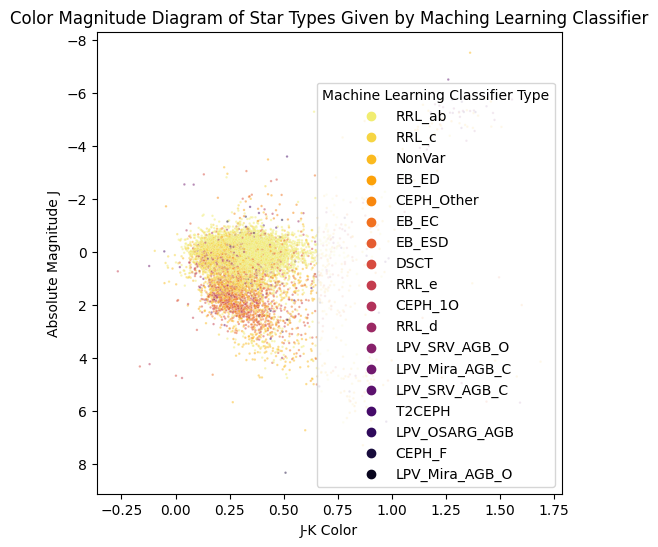

In [14]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="ML_classifier_type", alpha=0.5, s=3, palette="inferno_r")
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('test_ml_types.eps', format='eps', dpi=1000)

Text(0, 0.5, 'Absolute Magnitude J')

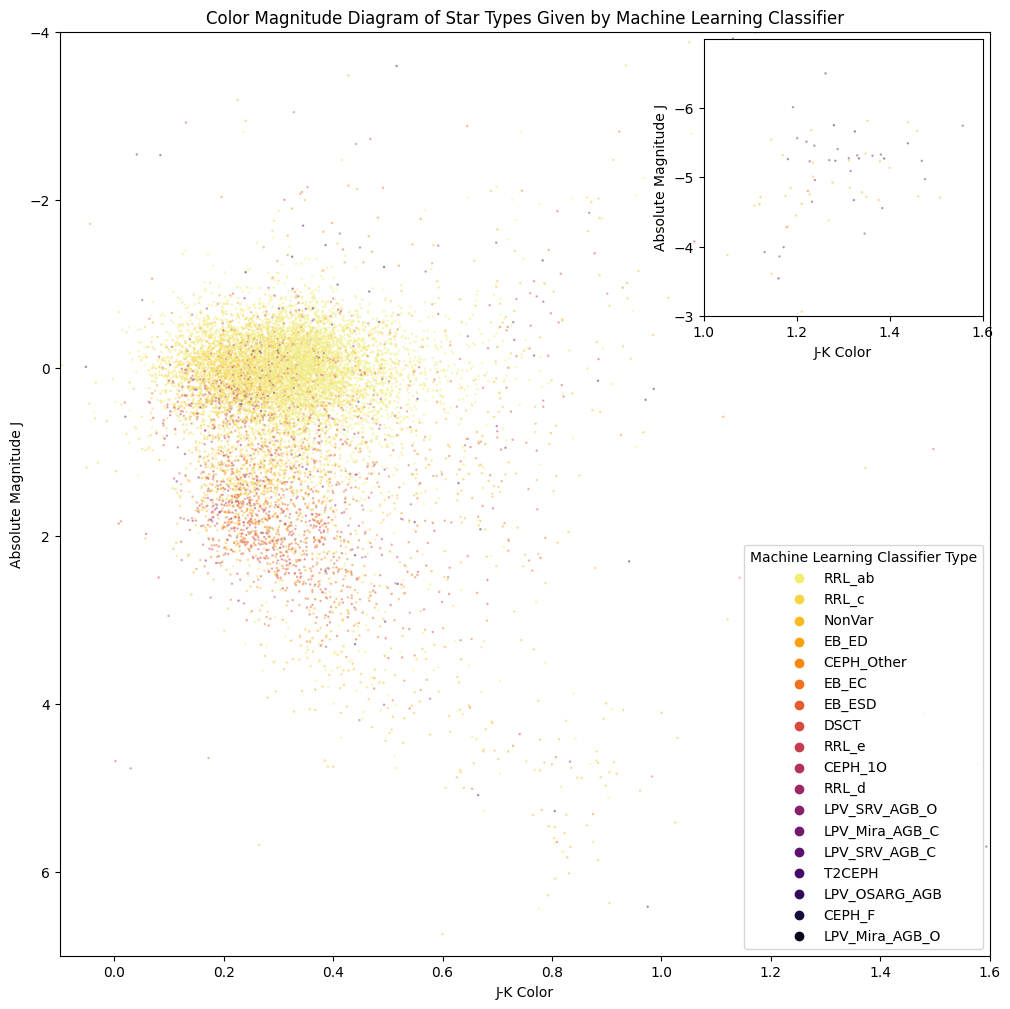

In [15]:
# Main plot
plt.figure(figsize=(12, 12))
scatter_plot = sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r"
)
plt.gca().invert_yaxis()
plt.title("Color Magnitude Diagram of Star Types Given by Machine Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type", loc="lower right")
plt.xlim(-0.1, 1.6)
plt.ylim(7, -4)

# Adding an inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define inset location and size
ax_inset = inset_axes(plt.gca(), width="30%", height="30%", loc="upper right")
sns.scatterplot(
    x="J_minus_K", 
    y="abs_mag_J", 
    data=errors, 
    hue="ML_classifier_type", 
    alpha=0.5, 
    s=3, 
    palette="inferno_r", 
    legend=False, 
    ax=ax_inset
)

# Adjust inset axis limits (zoomed area)
ax_inset.set_xlim(1, 1.6)  # Adjust as needed
ax_inset.set_ylim(-3, -7)      # Adjust as needed
#ax_inset.invert_yaxis()
ax_inset.set_xticks(np.arange(1, 1.6, 0.2))
ax_inset.set_yticks(np.arange(-3, -7, -1)) 
ax_inset.set_xlabel("J-K Color")
ax_inset.set_ylabel("Absolute Magnitude J")

# plt.savefig('inset_ml_types_fig.eps', format='eps', dpi=1000)

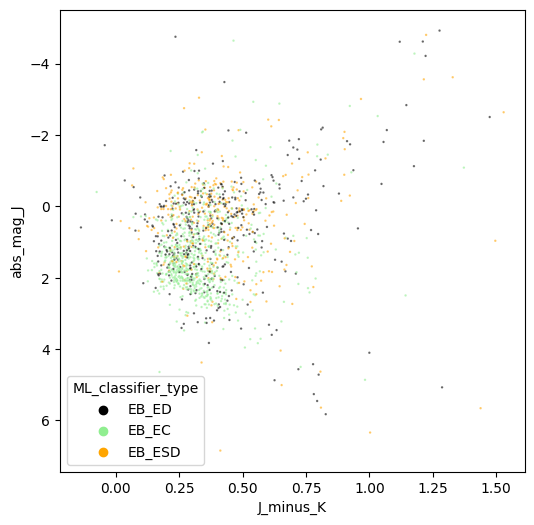

In [16]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=eclipsing, hue="ML_classifier_type", alpha=0.6, s=3, palette=["black", "lightgreen", "orange"])
plt.gca().invert_yaxis()
plt.show()

In [17]:
rr_lyrae = errors[(errors["ML_classifier_type"] == "RRL_ab") | (errors["ML_classifier_type"] == "RRL_c") | (errors["ML_classifier_type"] == "RRL_d")]
rr_lyrae

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,0.012,0.012,RRAB,RRL_ab,NaN,RRAB,0.14829,26.66375,GV Peg,0.228
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,0.034,0.034,RRC,RRL_c,NaN,RRC,0.18471,37.84283,ROTSE1 J000044.33 +375034.2,0.216
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,0.123,0.124,RRAB,RRL_ab,NaN,RRAB,0.27937,58.55164,EW Cas,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25383,563644,2268,2161,2385,15.877,Gaia DR3 2016185127681782016,14.883,0.005,1.864,1.975,...,0.158,0.161,RRC,RRL_c,NaN,RRC,359.63561,63.87707,WISE J235832.5+635237,0.525
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,0.050,0.050,RRC,RRL_c,NaN,RRC,359.77146,54.01686,QY Cas,0.323
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,0.043,0.059,RRC,RRL_c,NaN,RRC,359.80239,53.94432,PS1-3PI J235912.57+535639.5,0.378
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192


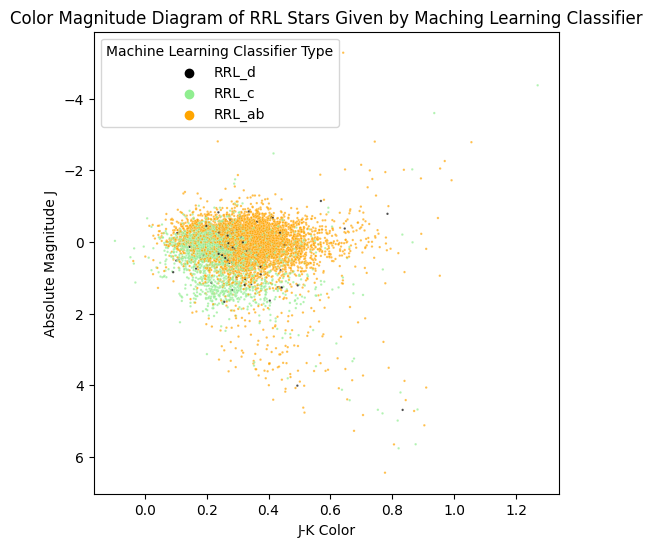

In [18]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae, hue="ML_classifier_type", hue_order=["RRL_d", "RRL_c", "RRL_ab"], alpha=0.7, palette=["black", "lightgreen", "orange"], s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Maching Learning Classifier")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Machine Learning Classifier Type")

# plt.savefig('rrl.eps', format='eps', dpi=1000)

In [19]:
rr_lyrae_ab = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_ab"]

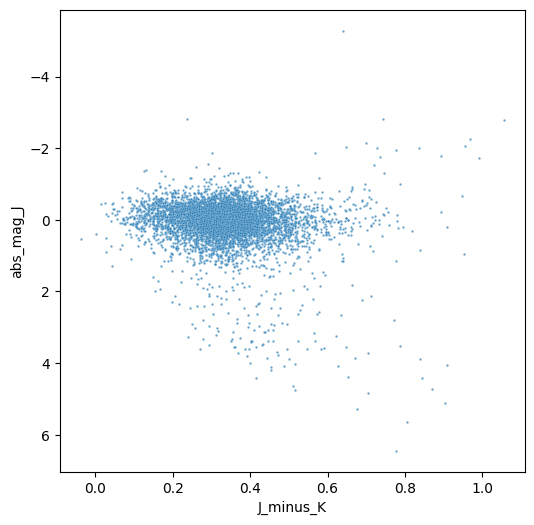

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_ab, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [21]:
rr_lyrae_c = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_c"]

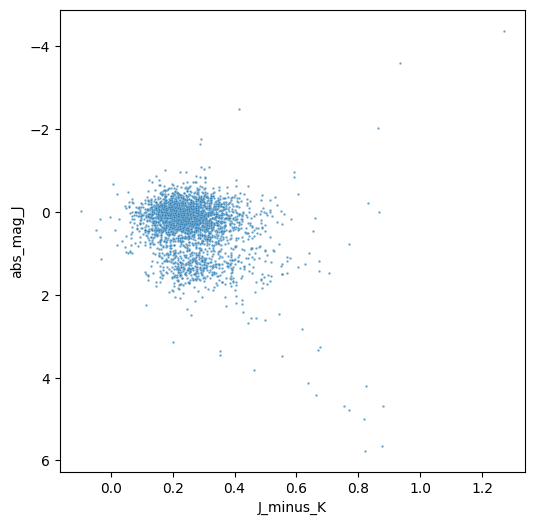

In [22]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_c, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [23]:
rr_lyrae_d = rr_lyrae[rr_lyrae["ML_classifier_type"] == "RRL_d"]

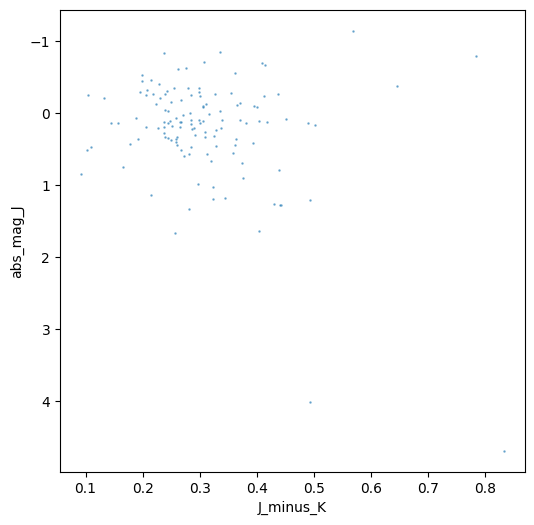

In [24]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=rr_lyrae_d, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [25]:
clean_final["visual_classification_type"].unique()

array([nan, 'RRC', 'constant', 'RRab', 'possibly', "I'd", 'EB', 'EW',
       'RR(B)', 'RRAB', 'BY', 'EA', 'SRA', 'const', 'SXPHE', 'RS', 'L',
       'SRB', 'need', 'GDOR:', 'DSCT', 'BY:', 'INS', 'GDOR', 'CEP:', 'SR',
       'SRD', 'no', 'DCEP', 'CWA:', 'CEP', 'cosntant', 'RS:', 'CEPH',
       'YSO'], dtype=object)

In [26]:
clean_final_rr = clean_final[(clean_final["visual_classification_type"] == "RRAB") | (clean_final["visual_classification_type"] == "RRab") | (clean_final["visual_classification_type"] == "RRC") | (clean_final["visual_classification_type"] == "RR(B)") | (clean_final["visual_classification_type"] == "RRC/EW") | (clean_final["visual_classification_type"] == "RRAB/CWB") | (clean_final["visual_classification_type"] == "RRd") | (clean_final["visual_classification_type"] == "RRC/EW?") | (clean_final["visual_classification_type"] == "RRC?")]
len(clean_final_rr)

1630

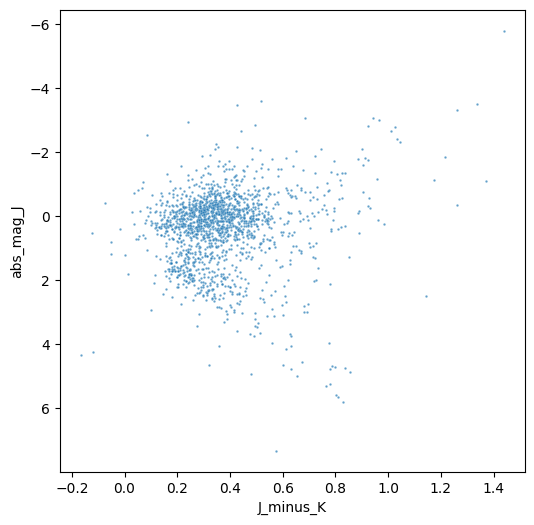

In [27]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=clean_final_rr, alpha=0.7, s=3)
plt.gca().invert_yaxis()
plt.show()
# plt.savefig('test_eps_plot.eps', format='eps') 

In [28]:
rr_lyrae.groupby("ML_classifier_type").agg("count").reset_index()

,ML_classifier_type,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,RRL_ab,6212,6212,6212,6212,6212,6212,6212,6212,6212,...,6212,6212,6212,6212,0,6212,6212,6212,6212,6212
1,RRL_c,2817,2817,2817,2817,2817,2817,2817,2817,2817,...,2817,2817,2817,2817,0,2817,2817,2817,2817,2817
2,RRL_d,127,127,127,127,127,127,127,127,127,...,127,127,127,127,0,127,127,127,127,127


In [29]:
clean_final.groupby("ML_classifier_type").agg("count").reset_index()

,ML_classifier_type,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,CEPH_1O,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
1,CEPH_F,80,80,80,80,80,80,80,80,80,...,80,80,80,80,80,80,80,80,80,80
2,CEPH_Other,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
3,DSCT,337,337,337,337,337,337,337,337,337,...,337,337,337,337,337,337,337,337,337,337
4,EB_EC,692,692,692,692,692,692,692,692,692,...,692,692,692,692,692,692,692,692,692,692
5,EB_ED,392,392,392,392,392,392,392,392,392,...,392,392,392,392,392,392,392,392,392,392
6,EB_ESD,345,345,345,345,345,345,345,345,345,...,345,345,345,345,345,345,345,345,345,345
7,LPV_Mira_AGB_C,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32
8,LPV_Mira_AGB_O,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
9,LPV_OSARG_AGB,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8


In [30]:
eclipsing.groupby("ML_classifier_type").agg("count").reset_index()

,ML_classifier_type,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,FinalType,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,EB_EC,692,692,692,692,692,692,692,692,692,...,692,692,692,692,692,692,692,692,692,692
1,EB_ED,392,392,392,392,392,392,392,392,392,...,392,392,392,392,392,392,392,392,392,392
2,EB_ESD,345,345,345,345,345,345,345,345,345,...,345,345,345,345,345,345,345,345,345,345


In [31]:
errors.groupby("FinalType").agg("count").reset_index()

,FinalType,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,ext_correct_K,ext_correct_K_low,ext_correct_K_high,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,BY,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
1,BY:,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,CEP,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
3,CEPH,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
4,CONST,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
5,CONSTANT,174,174,174,174,174,174,174,174,174,...,174,174,174,174,174,174,174,174,174,174
6,CWA:,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,DCEP,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
8,DSCT,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82
9,EA,82,82,82,82,82,82,82,82,82,...,82,82,82,82,82,82,82,82,82,82


In [32]:
rr_lyrae_final = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)")]
rr_lyrae_final

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,ext_correct_K_low,ext_correct_K_high,FinalType,ML_classifier_type,visual_classification_type,VSX_type,VSX_RA,VSX_Dec,VSX_name,J_minus_K
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,0.015,0.015,RRAB,RRL_ab,NaN,RRAB,0.01521,35.36286,GM And,0.336
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,0.043,0.043,RRAB,RRL_ab,NaN,RRAB,0.09900,36.32870,NSVS 6313844,0.399
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,0.012,0.012,RRAB,RRL_ab,NaN,RRAB,0.14829,26.66375,GV Peg,0.228
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,0.034,0.034,RRC,RRL_c,NaN,RRC,0.18471,37.84283,ROTSE1 J000044.33 +375034.2,0.216
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,0.123,0.124,RRAB,RRL_ab,NaN,RRAB,0.27937,58.55164,EW Cas,0.435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,0.050,0.050,RRC,RRL_c,NaN,RRC,359.77146,54.01686,QY Cas,0.323
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,0.043,0.059,RRC,RRL_c,NaN,RRC,359.80239,53.94432,PS1-3PI J235912.57+535639.5,0.378
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,0.000,0.000,RRC,NonVar,RRC,RRC,359.93546,17.65683,ASAS J235945+1739.5,0.250
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,0.000,0.000,RRC,RRL_c,NaN,RRC,359.93652,-11.75557,ASASSN-V J235944.77-114520.0,0.192


In [33]:
final_data = errors[(errors["FinalType"] == "RRAB") | (errors["FinalType"] == "RRC") | (errors["FinalType"] == "RR(B)") |  (errors["FinalType"] == "EW") | (errors["FinalType"] == "DSCT") | (errors["FinalType"] == "SXPHE")] 

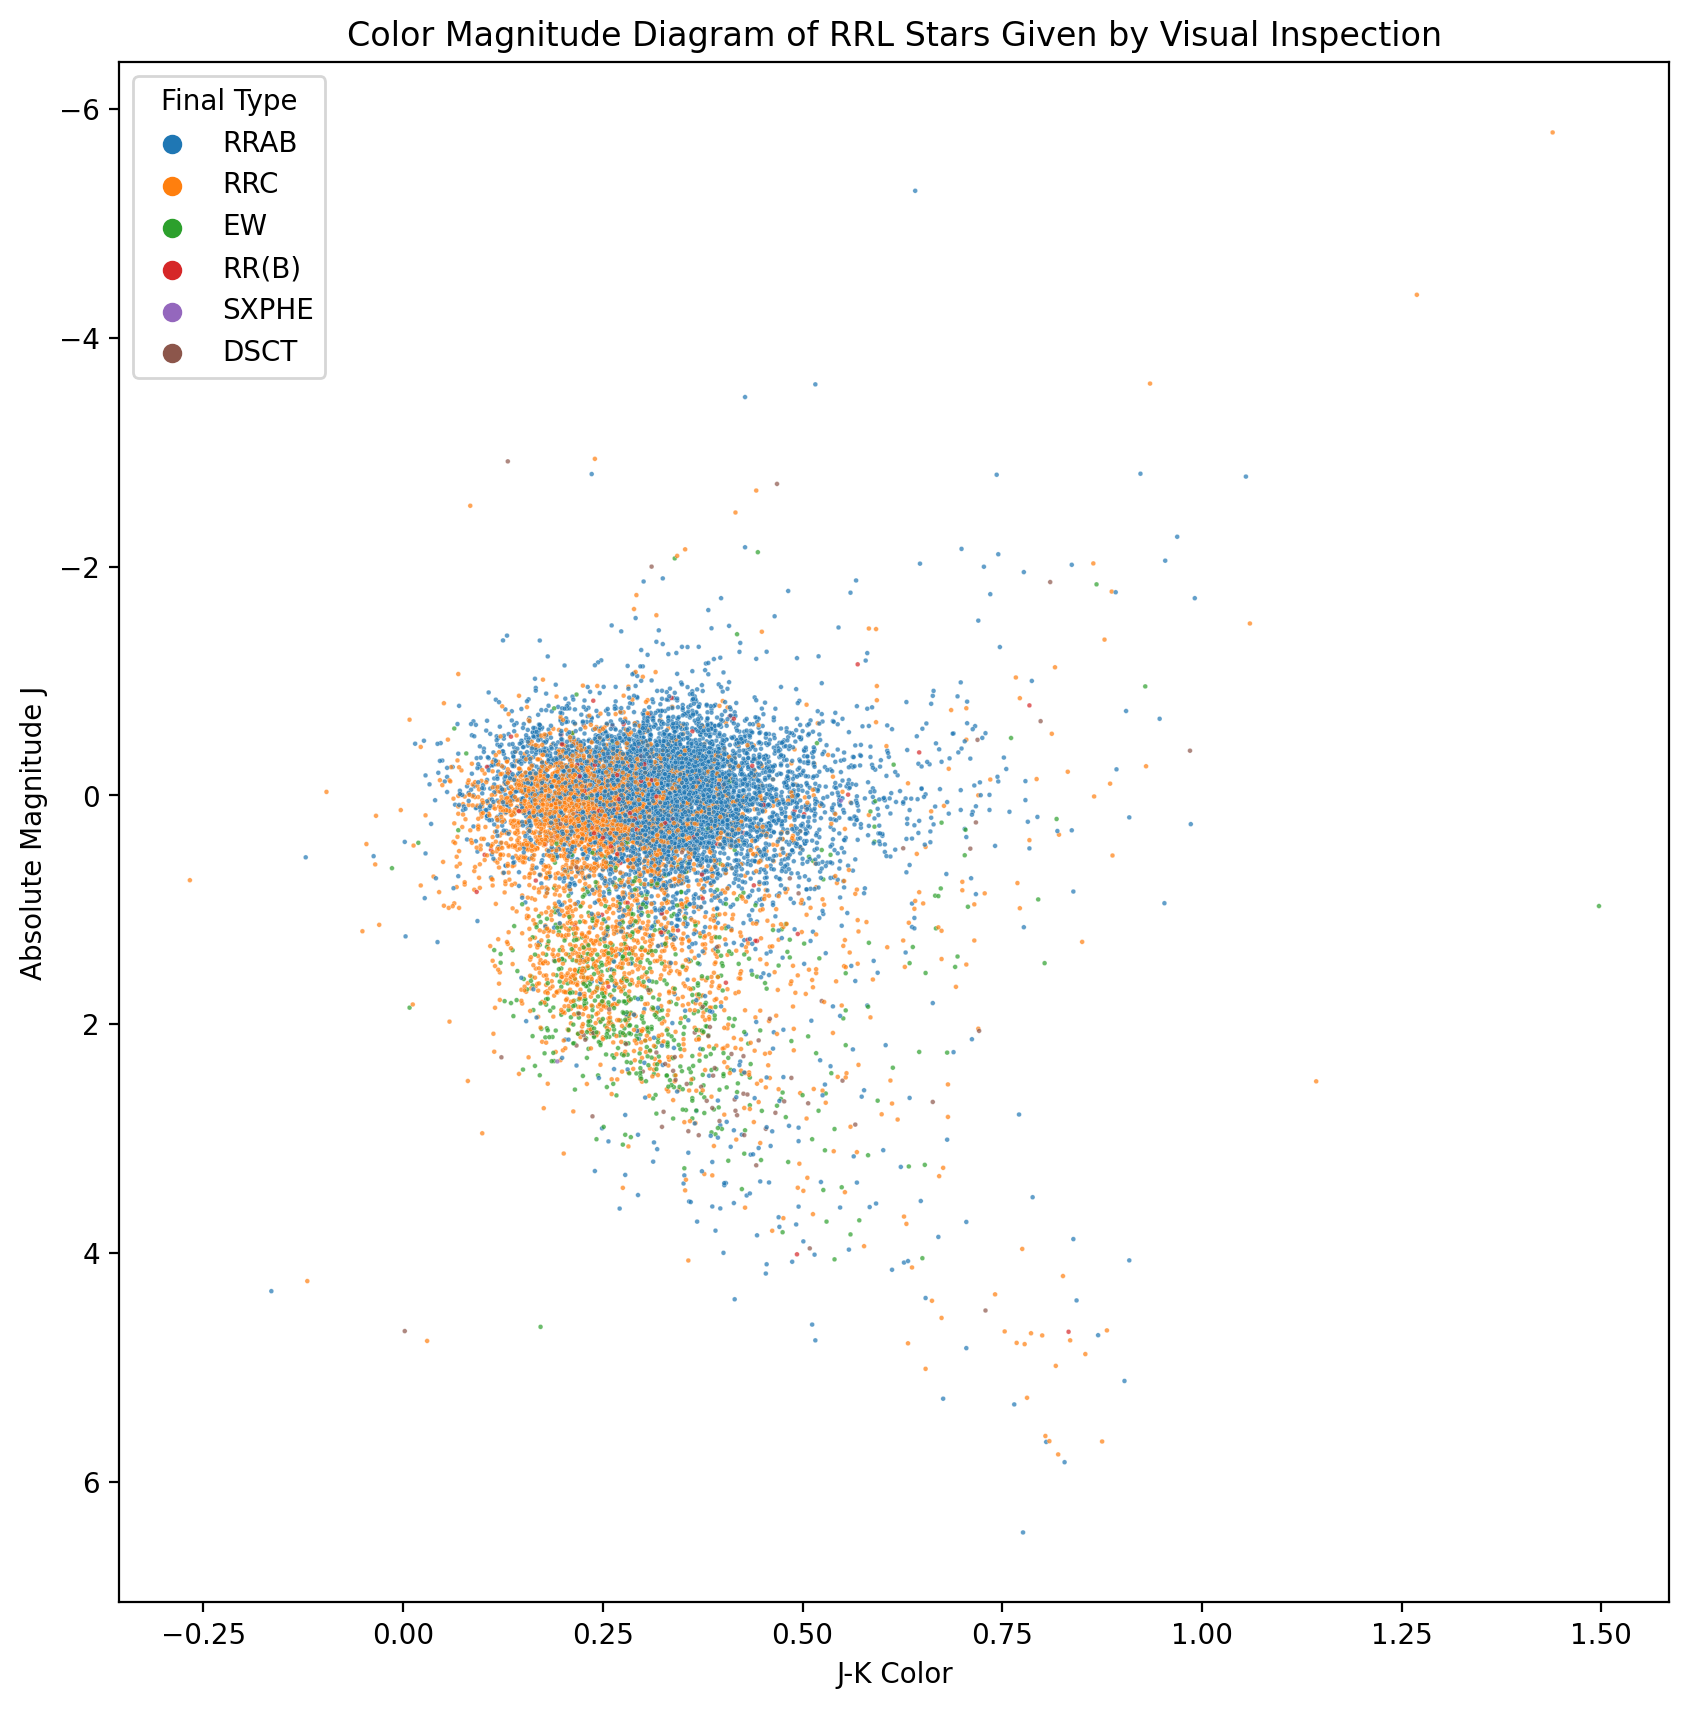

In [34]:
plt.figure(figsize=(10, 10), dpi = 200)
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=final_data, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

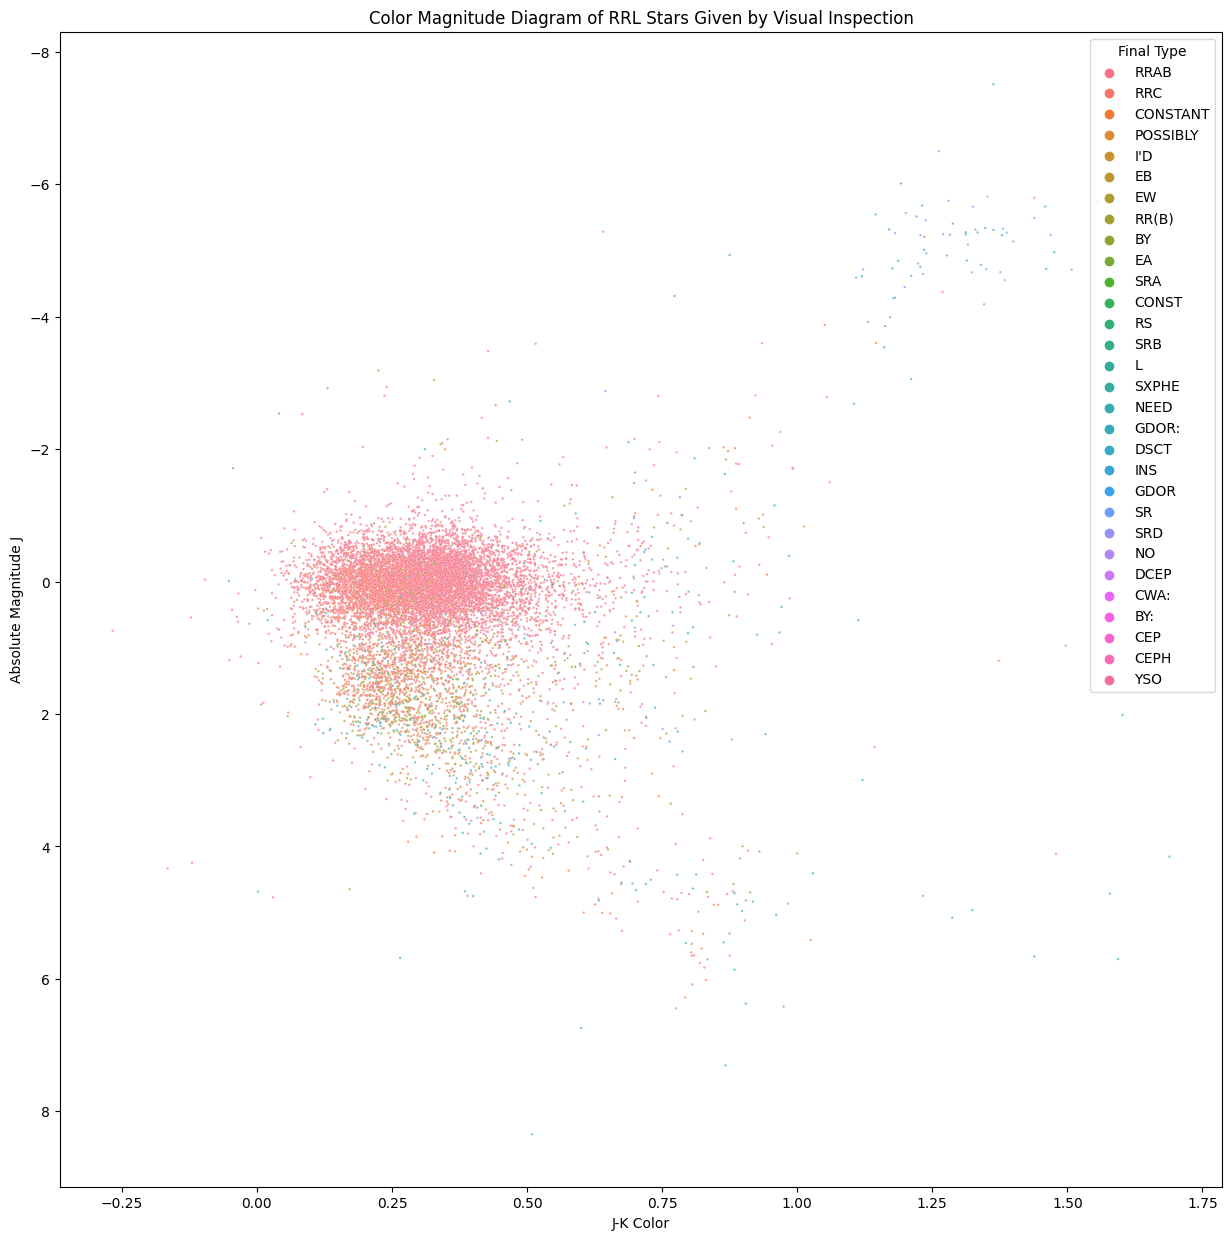

In [35]:
plt.figure(figsize=(15, 15))
sns.scatterplot(x="J_minus_K", y="abs_mag_J", data=errors, hue="FinalType", alpha=0.7, s=3)
plt.gca().invert_yaxis()

plt.title("Color Magnitude Diagram of RRL Stars Given by Visual Inspection")
plt.xlabel("J-K Color")
plt.ylabel("Absolute Magnitude J")
plt.legend(title="Final Type")

In [36]:
errors["ext_correct_J"].mean()

0.11854960167714886

In [37]:
errors["ext_correct_K"].mean()

0.05079454926624738

In [38]:
# Error calculations
errors['J-K'] = errors['J_mag'] - errors['K_mag']
errors['J-K_err'] = np.sqrt(errors['J_mag_err']**2 + errors['K_mag_err']**2)

In [39]:
# Distance uncertainty calculation
errors['sigma_distance'] = (errors['distance_high'] - errors['distance_low']) / 2
errors['sigma_dist_term'] = (5/np.log(10)) * (errors['sigma_distance']/errors['distance'])

In [40]:
# Calculate E(B-V) using extinction corrections
R_J = 0.91  # From Yuan et al. 2013
R_K = 0.39

# Derive E(B-V) from extinction corrections
errors['E(B-V)'] = errors['ext_correct_J'] / R_J  # A_J = R_J * E(B-V) => E(B-V) = A_J/R_J

# Now calculate A_J and E(J-K) safely
errors['A_J'] = R_J * errors['E(B-V)']
errors['E(J-K)'] = (R_J - R_K) * errors['E(B-V)']

In [41]:
# Absolute magnitude calculation with error propagation
errors['abs_mag_J'] = (errors['J_mag'] 
                      - 5 * np.log10(errors['distance']) 
                      + 5 
                      - errors['A_J'])
errors['abs_mag_J_err'] = np.sqrt(
    errors['J_mag_err']**2 + 
    errors['sigma_dist_term']**2 + 
    (R_J * 0.1 * errors['E(B-V)'])**2  # Assuming 10% error in E(B-V)
)

In [42]:
# Quality cuts
filtered = errors[
    (errors['J-K_err'] < 0.05) &
    (errors['abs_mag_J_err'] < 0.15) &
    (errors['E(J-K)'] < 0.1) &
    (errors['A_J'] < 1.5)
]

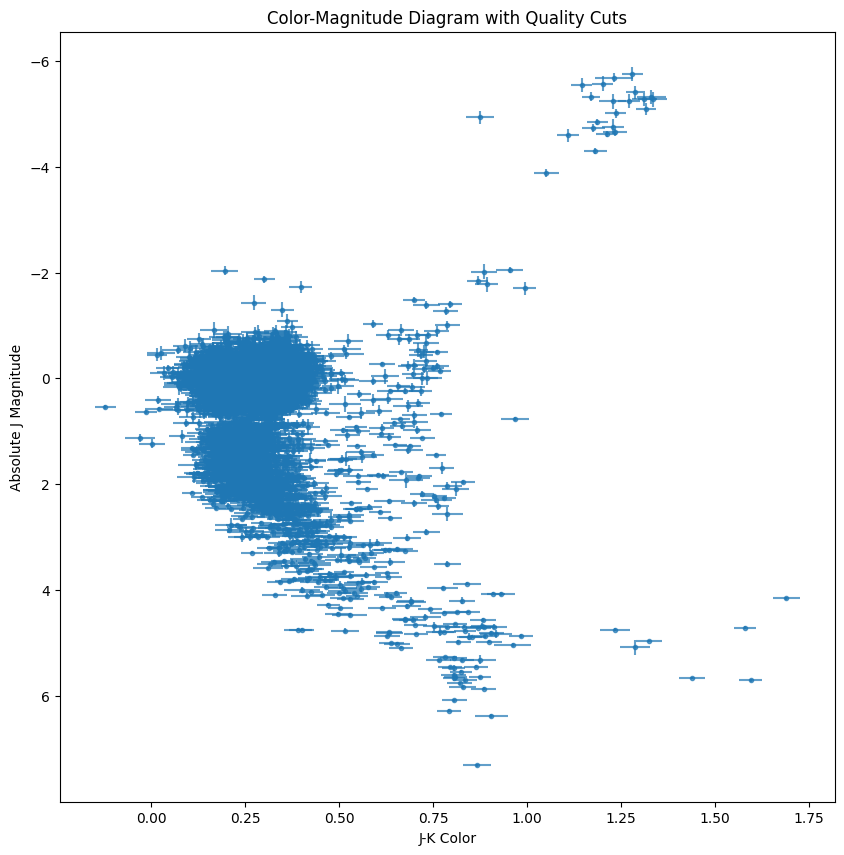

In [43]:
# Plotting
plt.figure(figsize=(10, 10))
plt.errorbar(x = filtered['J-K'], y = filtered['abs_mag_J'], xerr=filtered['J-K_err'], yerr=filtered['abs_mag_J_err'], fmt='o', markersize=3, alpha=0.7)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()

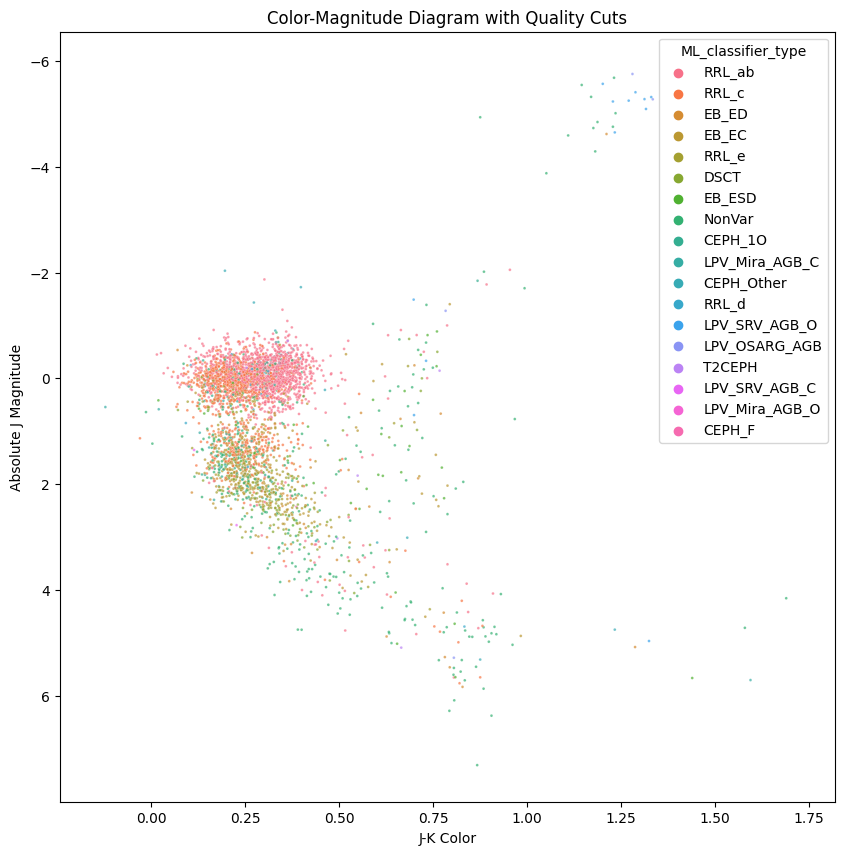

In [44]:
# Plotting
plt.figure(figsize=(10, 10))
plt.errorbar(
    x=filtered['J-K'], 
    y=filtered['abs_mag_J'], 
    xerr=filtered['J-K_err'], 
    yerr=filtered['abs_mag_J_err'], 
    fmt='none', 
    ecolor='gray', 
    alpha=0
)
sns.scatterplot(
    data=filtered,
    x='J-K',
    y='abs_mag_J',
    hue='ML_classifier_type',
    s=4,
    alpha=0.7,
)
plt.gca().invert_yaxis()
plt.xlabel('J-K Color')
plt.ylabel('Absolute J Magnitude')
plt.title('Color-Magnitude Diagram with Quality Cuts')
plt.show()


In [45]:
errors

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
0,8590948612,3778,3484,4082,13.245,Gaia DR3 2875539776437822592,12.869,0.012,-0.138,0.038,...,GM And,0.336,0.336,0.031828,299.0,0.171856,0.039560,0.036,0.020571,0.173295
4,661428842978,4131,3828,4440,14.566,Gaia DR3 2880106185667004928,14.215,0.011,0.796,0.961,...,NSVS 6313844,0.399,0.399,0.041110,306.0,0.160850,0.110989,0.101,0.057714,0.164121
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,GV Peg,0.228,0.228,0.030414,100.0,0.076785,0.031868,0.029,0.016571,0.079927
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,ROTSE1 J000044.33 +375034.2,0.216,0.216,0.031145,78.0,0.071106,0.087912,0.080,0.045714,0.075160
11,51540332578,2130,2072,2191,14.293,Gaia DR3 422761499325397120,13.595,0.009,0.984,1.052,...,EW Cas,0.435,0.435,0.033601,59.5,0.060659,0.317582,0.289,0.165143,0.072413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25388,137440324131,4474,4150,4908,14.784,Gaia DR3 1945536351631291264,14.641,0.008,1.000,1.163,...,QY Cas,0.323,0.323,0.045804,379.0,0.183949,0.127473,0.116,0.066286,0.186282
25389,661428930020,3221,3032,3469,14.135,Gaia DR3 1945532056664053376,14.846,0.006,1.928,2.098,...,PS1-3PI J235912.57+535639.5,0.378,0.378,0.044204,218.5,0.147304,0.124176,0.113,0.064571,0.150184
25391,472447133837,4426,4108,4813,16.119,Gaia DR3 2773761352308748032,13.928,0.005,0.698,0.860,...,ASAS J235945+1739.5,0.250,0.250,0.039825,352.5,0.172943,0.000000,0.000,0.000000,0.174740
25392,283468348278,4310,3755,4843,14.735,Gaia DR3 2422393685595709568,14.706,0.007,1.534,1.833,...,ASASSN-V J235944.77-114520.0,0.192,0.192,0.062169,544.0,0.274079,0.000000,0.000,0.000000,0.275406


In [46]:
rrl_ab = filtered[filtered["ML_classifier_type"] == "RRL_ab"]
rrl_c = filtered[filtered["ML_classifier_type"] == "RRL_c"]
nonvar = filtered[filtered["ML_classifier_type"] == "NonVar"]
eb_ec = filtered[filtered["ML_classifier_type"] == "EB_EC"]
rrl_e = filtered[filtered["ML_classifier_type"] == "RRL_e"]
dsct = filtered[filtered["ML_classifier_type"] == "DSCT"]
eb_ed = filtered[filtered["ML_classifier_type"] == "EB_ED"]
eb_esd = filtered[filtered["ML_classifier_type"] == "EB_ESD"]
rrl_d = filtered[filtered["ML_classifier_type"] == "RRL_d"]

/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_83838/4142491993.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(title=f"{len(rrl_ab)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_83838/4142491993.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend(title=f"{len(rrl_c)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_83838/4142491993.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax3.legend(title=f"{len(nonvar)} Stars")
/var/folders/kv/b7ycyzg17v3f_grsjzhtpwt80000gn/T/ipykernel_83838/4142491993.py:40: UserWarning: No artists with l

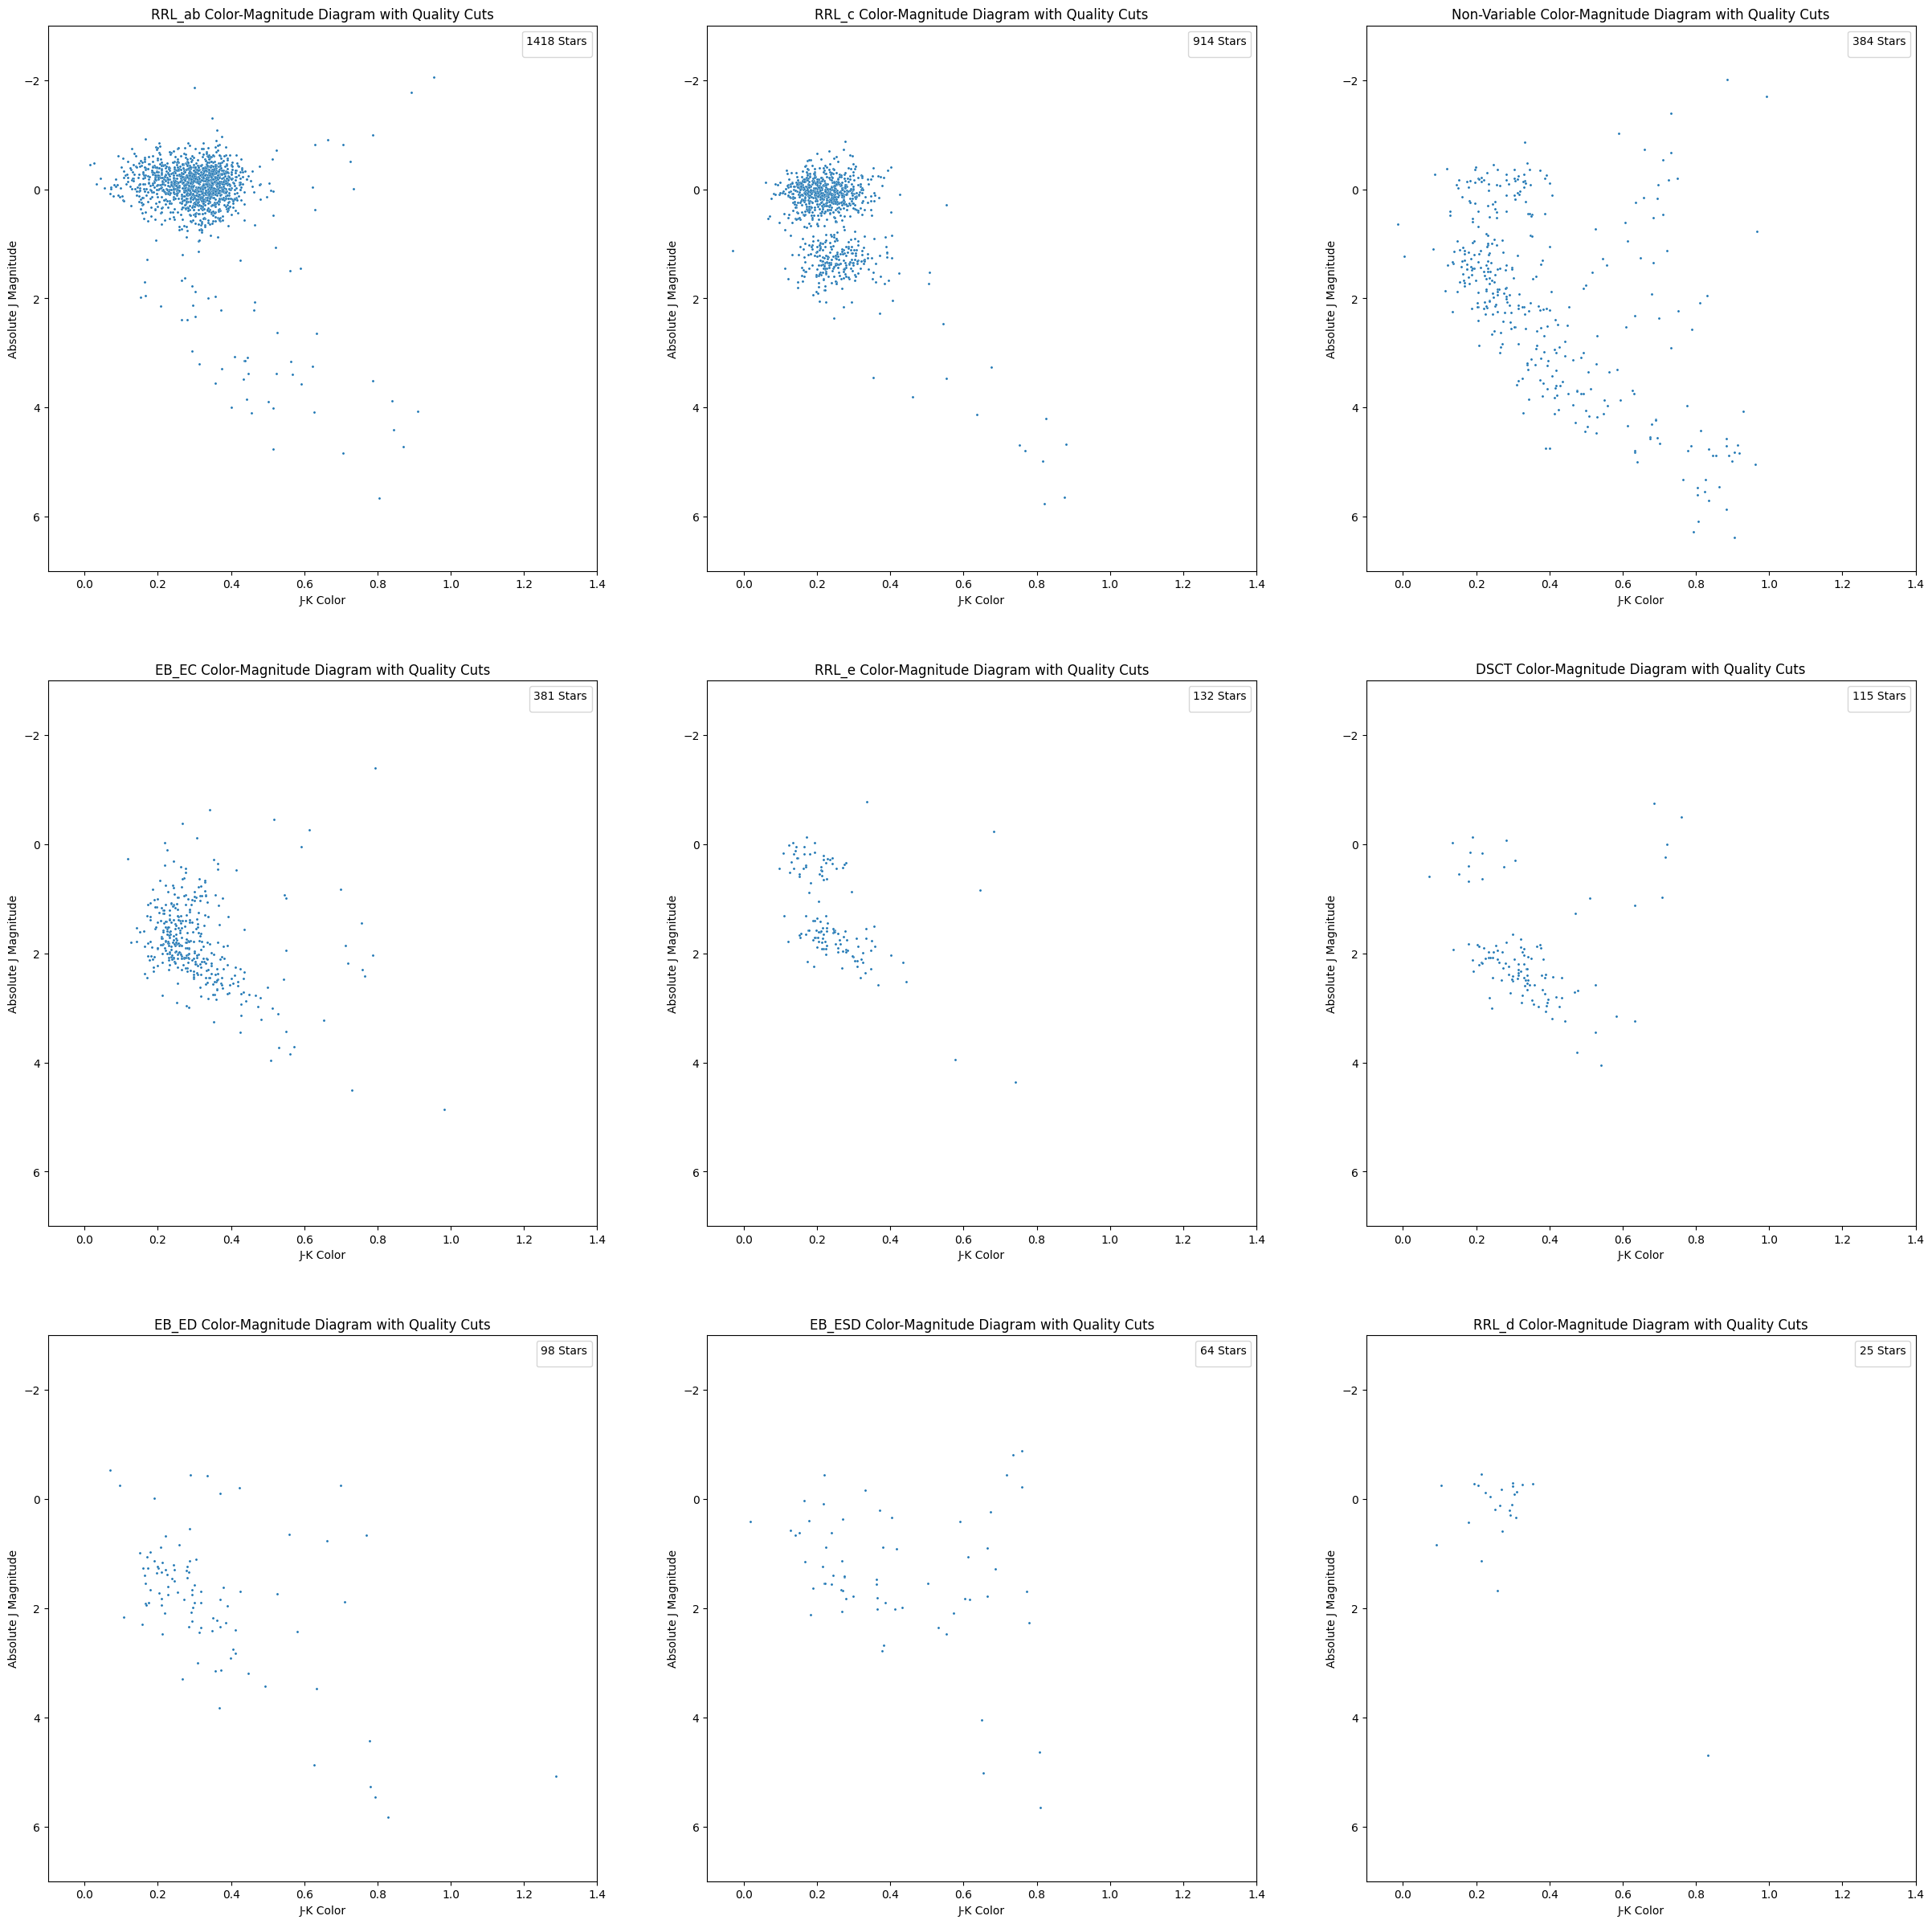

In [47]:
# Plotting
fig = plt.figure(figsize=(30, 30))

ax1 = fig.add_subplot(331)
sns.scatterplot(data=rrl_ab, x='J-K', y='abs_mag_J', s=5)
ax1.invert_yaxis()
ax1.set_xlabel('J-K Color')
ax1.set_ylabel('Absolute J Magnitude')
ax1.set_title('RRL_ab Color-Magnitude Diagram with Quality Cuts')
ax1.legend(title=f"{len(rrl_ab)} Stars")
ax1.set_xlim(-0.1, 1.4)
ax1.set_ylim(7, -3)

ax2 = fig.add_subplot(332)
sns.scatterplot(data=rrl_c, x='J-K', y='abs_mag_J', s=5)
ax2.invert_yaxis()
ax2.set_xlabel('J-K Color')
ax2.set_ylabel('Absolute J Magnitude')
ax2.set_title('RRL_c Color-Magnitude Diagram with Quality Cuts')
ax2.legend(title=f"{len(rrl_c)} Stars")
ax2.set_xlim(-0.1, 1.4)
ax2.set_ylim(7, -3)

ax3 = fig.add_subplot(333)
sns.scatterplot(data=nonvar, x='J-K', y='abs_mag_J', s=5)
ax3.invert_yaxis()
ax3.set_xlabel('J-K Color')
ax3.set_ylabel('Absolute J Magnitude')
ax3.set_title('Non-Variable Color-Magnitude Diagram with Quality Cuts')
ax3.legend(title=f"{len(nonvar)} Stars")
ax3.set_xlim(-0.1, 1.4)
ax3.set_ylim(7, -3)

ax4 = fig.add_subplot(334)
sns.scatterplot(data=eb_ec, x='J-K', y='abs_mag_J', s=5)
ax4.invert_yaxis()
ax4.set_xlabel('J-K Color')
ax4.set_ylabel('Absolute J Magnitude')
ax4.set_title('EB_EC Color-Magnitude Diagram with Quality Cuts')
ax4.legend(title=f"{len(eb_ec)} Stars")
ax4.set_xlim(-0.1, 1.4)
ax4.set_ylim(7, -3)

ax5 = fig.add_subplot(335)
sns.scatterplot(data=rrl_e, x='J-K', y='abs_mag_J', s=5)
ax5.invert_yaxis()
ax5.set_xlabel('J-K Color')
ax5.set_ylabel('Absolute J Magnitude')
ax5.set_title('RRL_e Color-Magnitude Diagram with Quality Cuts')
ax5.legend(title=f"{len(rrl_e)} Stars")
ax5.set_xlim(-0.1, 1.4)
ax5.set_ylim(7, -3)

ax6 = fig.add_subplot(336)
sns.scatterplot(data=dsct, x='J-K', y='abs_mag_J', s=5)
ax6.invert_yaxis()
ax6.set_xlabel('J-K Color')
ax6.set_ylabel('Absolute J Magnitude')
ax6.set_title('DSCT Color-Magnitude Diagram with Quality Cuts')
ax6.legend(title=f"{len(dsct)} Stars")
ax6.set_xlim(-0.1, 1.4)
ax6.set_ylim(7, -3)

ax7 = fig.add_subplot(337)
sns.scatterplot(data=eb_ed, x='J-K', y='abs_mag_J', s=5)
ax7.invert_yaxis()
ax7.set_xlabel('J-K Color')
ax7.set_ylabel('Absolute J Magnitude')
ax7.set_title('EB_ED Color-Magnitude Diagram with Quality Cuts')
ax7.legend(title=f"{len(eb_ed)} Stars")
ax7.set_xlim(-0.1, 1.4)
ax7.set_ylim(7, -3)

ax8 = fig.add_subplot(338)
sns.scatterplot(data=eb_esd, x='J-K', y='abs_mag_J', s=5)
ax8.invert_yaxis()
ax8.set_xlabel('J-K Color')
ax8.set_ylabel('Absolute J Magnitude')
ax8.set_title('EB_ESD Color-Magnitude Diagram with Quality Cuts')
ax8.legend(title=f"{len(eb_esd)} Stars")
ax8.set_xlim(-0.1, 1.4)
ax8.set_ylim(7, -3)

ax9 = fig.add_subplot(339)
sns.scatterplot(data=rrl_d, x='J-K', y='abs_mag_J', s=5)
ax9.invert_yaxis()
ax9.set_xlabel('J-K Color')
ax9.set_ylabel('Absolute J Magnitude')
ax9.set_title('RRL_d Color-Magnitude Diagram with Quality Cuts')
ax9.legend(title=f"{len(rrl_d)} Stars")
ax9.set_xlim(-0.1, 1.4)
ax9.set_ylim(7, -3)

plt.show()

In [48]:
filtered.groupby("FinalType").agg("count").reset_index().sort_values(by="ASASSN_id", ascending=False)

,FinalType,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
18,RRAB,1512,1512,1512,1512,1512,1512,1512,1512,1512,...,1512,1512,1512,1512,1512,1512,1512,1512,1512,1512
19,RRC,1298,1298,1298,1298,1298,1298,1298,1298,1298,...,1298,1298,1298,1298,1298,1298,1298,1298,1298,1298
11,EW,418,418,418,418,418,418,418,418,418,...,418,418,418,418,418,418,418,418,418,418
15,NEED,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
5,CONSTANT,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
8,DSCT,46,46,46,46,46,46,46,46,46,...,46,46,46,46,46,46,46,46,46,46
10,EB,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
17,RR(B),31,31,31,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31
9,EA,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27
21,SR,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19


In [53]:
filtered_rr = filtered[
    (filtered["FinalType"] == "RRAB") |
    (filtered["FinalType"] == "RRC") |
    (filtered["FinalType"] == "RR(B)")
]
filtered_rr

,ASASSN_id,distance,distance_low,distance_high,g_mag,Gaia_name,G_mag,G_mag_err,abs_mag_G,abs_mag_G_low,...,VSX_name,J_minus_K,J-K,J-K_err,sigma_distance,sigma_dist_term,E(B-V),A_J,E(J-K),abs_mag_J_err
7,249108450355,2828,2736,2936,13.397,Gaia DR3 2853512332285518592,13.160,0.010,0.806,0.877,...,GV Peg,0.228,0.228,0.030414,100.0,0.076785,0.031868,0.029,0.016571,0.079927
8,111669995433,2382,2316,2472,13.186,Gaia DR3 2880528638650410624,13.047,0.007,0.896,0.957,...,ROTSE1 J000044.33 +375034.2,0.216,0.216,0.031145,78.0,0.071106,0.087912,0.080,0.045714,0.075160
21,489626456195,788,773,806,10.729,Gaia DR3 2336550174250087936,10.310,0.014,0.827,0.869,...,RU Scl,0.320,0.320,0.030610,16.5,0.045469,0.000000,0.000,0.000000,0.051414
22,343598279853,3578,3420,3758,13.989,Gaia DR3 4702887900907901184,13.686,0.013,0.841,0.939,...,NSV 5,0.202,0.202,0.036878,169.0,0.102565,0.025275,0.023,0.013143,0.105361
29,386548171330,1874,1796,1941,12.261,Gaia DR3 2414817603803476864,11.991,0.010,0.627,0.719,...,UU Cet,0.341,0.341,0.035355,72.5,0.084008,0.000000,0.000,0.000000,0.087649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25353,395137554459,2114,2029,2198,12.611,Gaia DR3 2334529752915355520,12.401,0.011,0.775,0.865,...,TX Scl,0.328,0.328,0.031145,84.5,0.086797,0.000000,0.000,0.000000,0.089793
25358,661428743124,1911,1816,2018,12.260,Gaia DR3 2765589163416465792,12.065,0.010,0.465,0.575,...,V0618 Peg,0.303,0.303,0.031113,101.0,0.114766,0.063736,0.058,0.033143,0.117000
25359,627065854252,2928,2806,3045,12.996,Gaia DR3 6521271603997336832,12.812,0.006,0.439,0.532,...,CZ Phe,0.268,0.268,0.036797,119.5,0.088624,0.013187,0.012,0.006857,0.092653
25381,171799410708,219,218,220,12.026,Gaia DR3 2846673747917949568,11.583,0.003,4.821,4.839,...,NSVS 9057868,0.428,0.428,0.031890,1.0,0.009915,0.019780,0.018,0.010286,0.026030


In [55]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

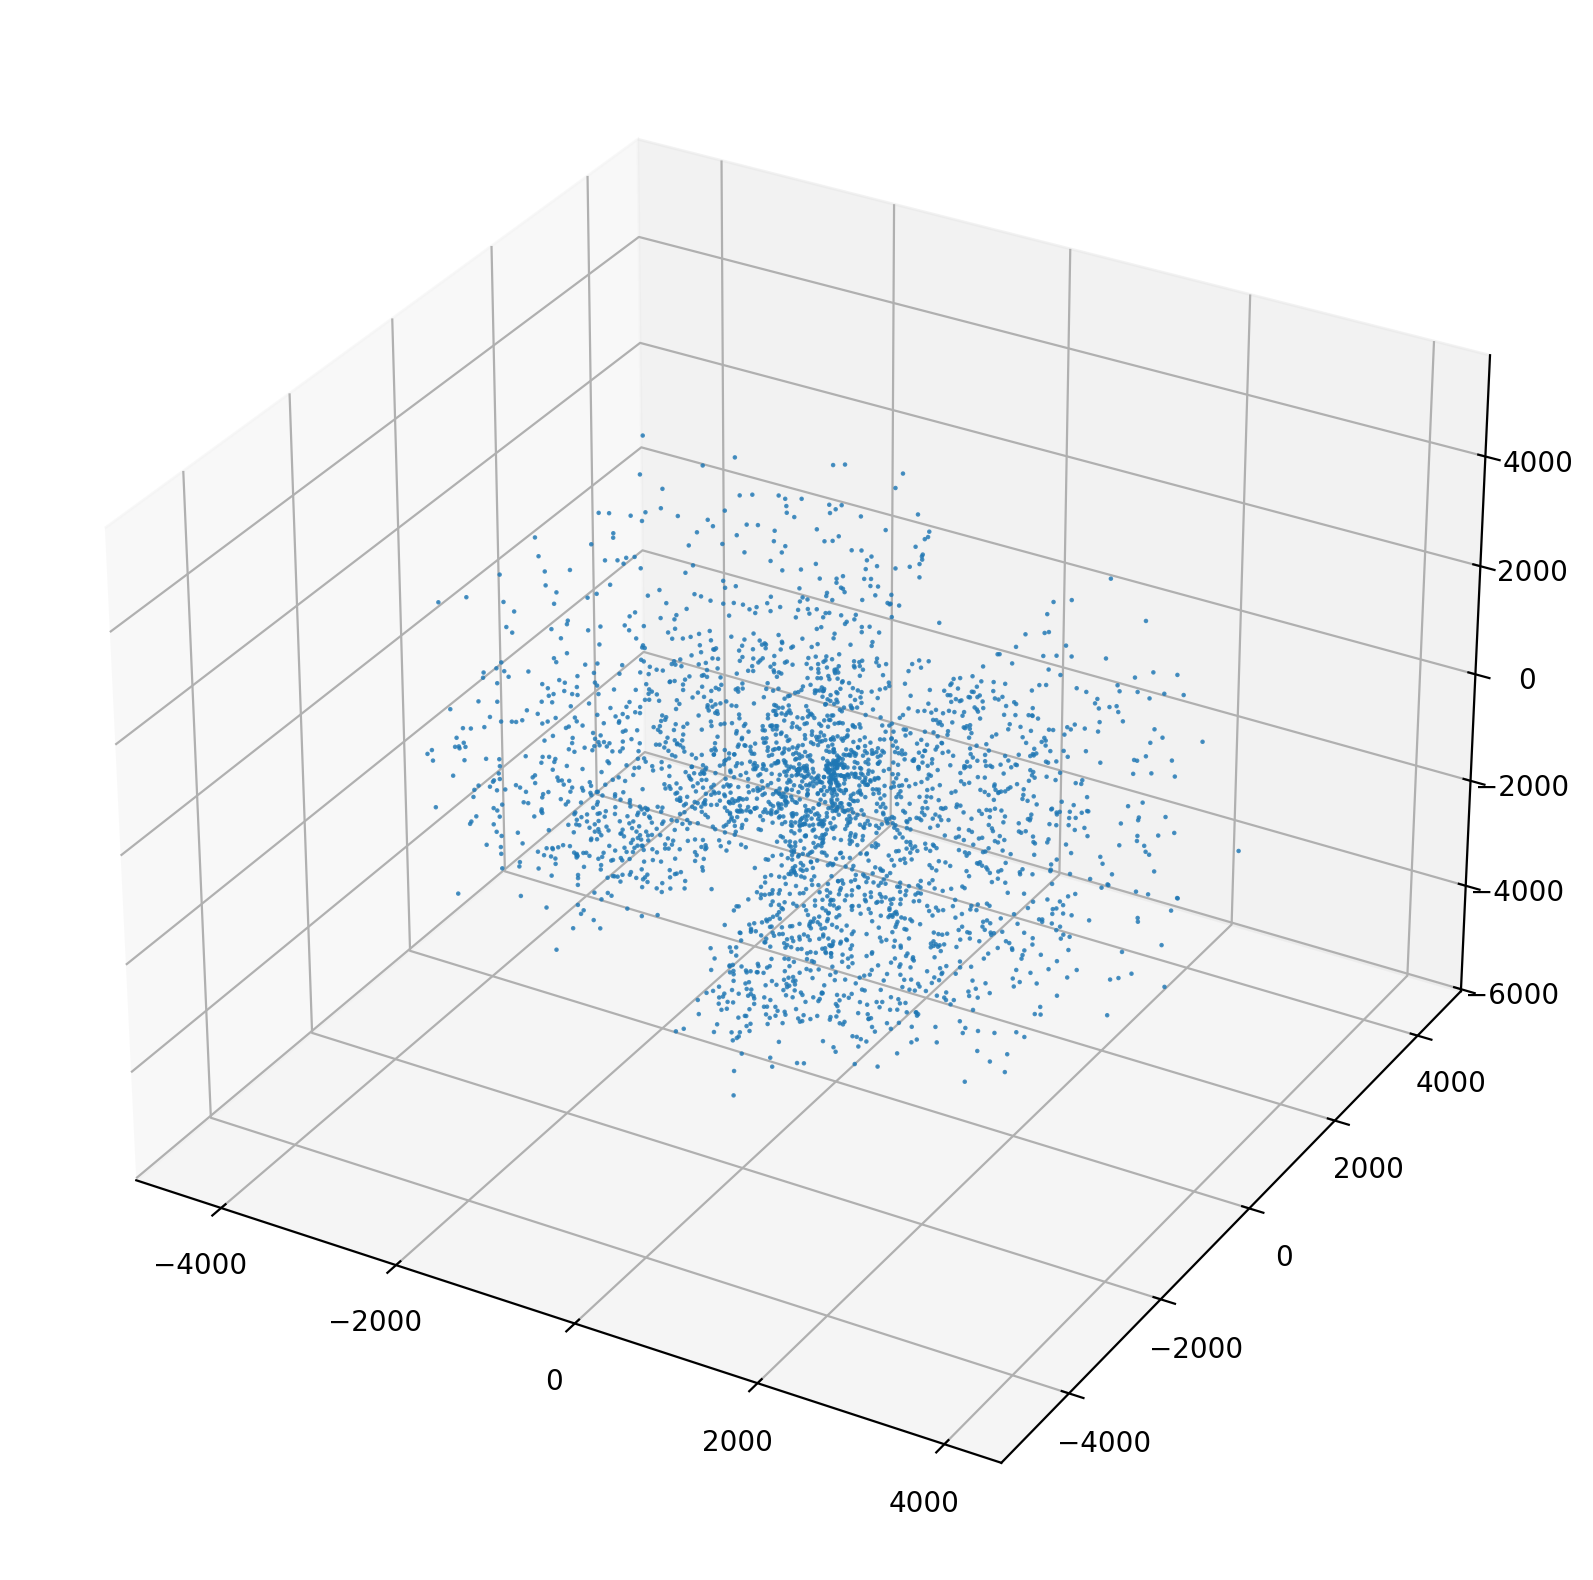

In [56]:
fig = plt.figure(figsize=(10, 10), dpi = 200)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, alpha = 0.8, s = 0.4)

In [57]:
ra_rad = np.radians(filtered_rr['VSX_RA'])
dec_rad = np.radians(filtered_rr['VSX_Dec'])

x = filtered_rr['distance'] * np.cos(dec_rad) * np.cos(ra_rad)
y = filtered_rr['distance'] * np.cos(dec_rad) * np.sin(ra_rad)
z = filtered_rr['distance'] * np.sin(dec_rad)

fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=1.5,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    width=800,
    height=800
)

fig.show()


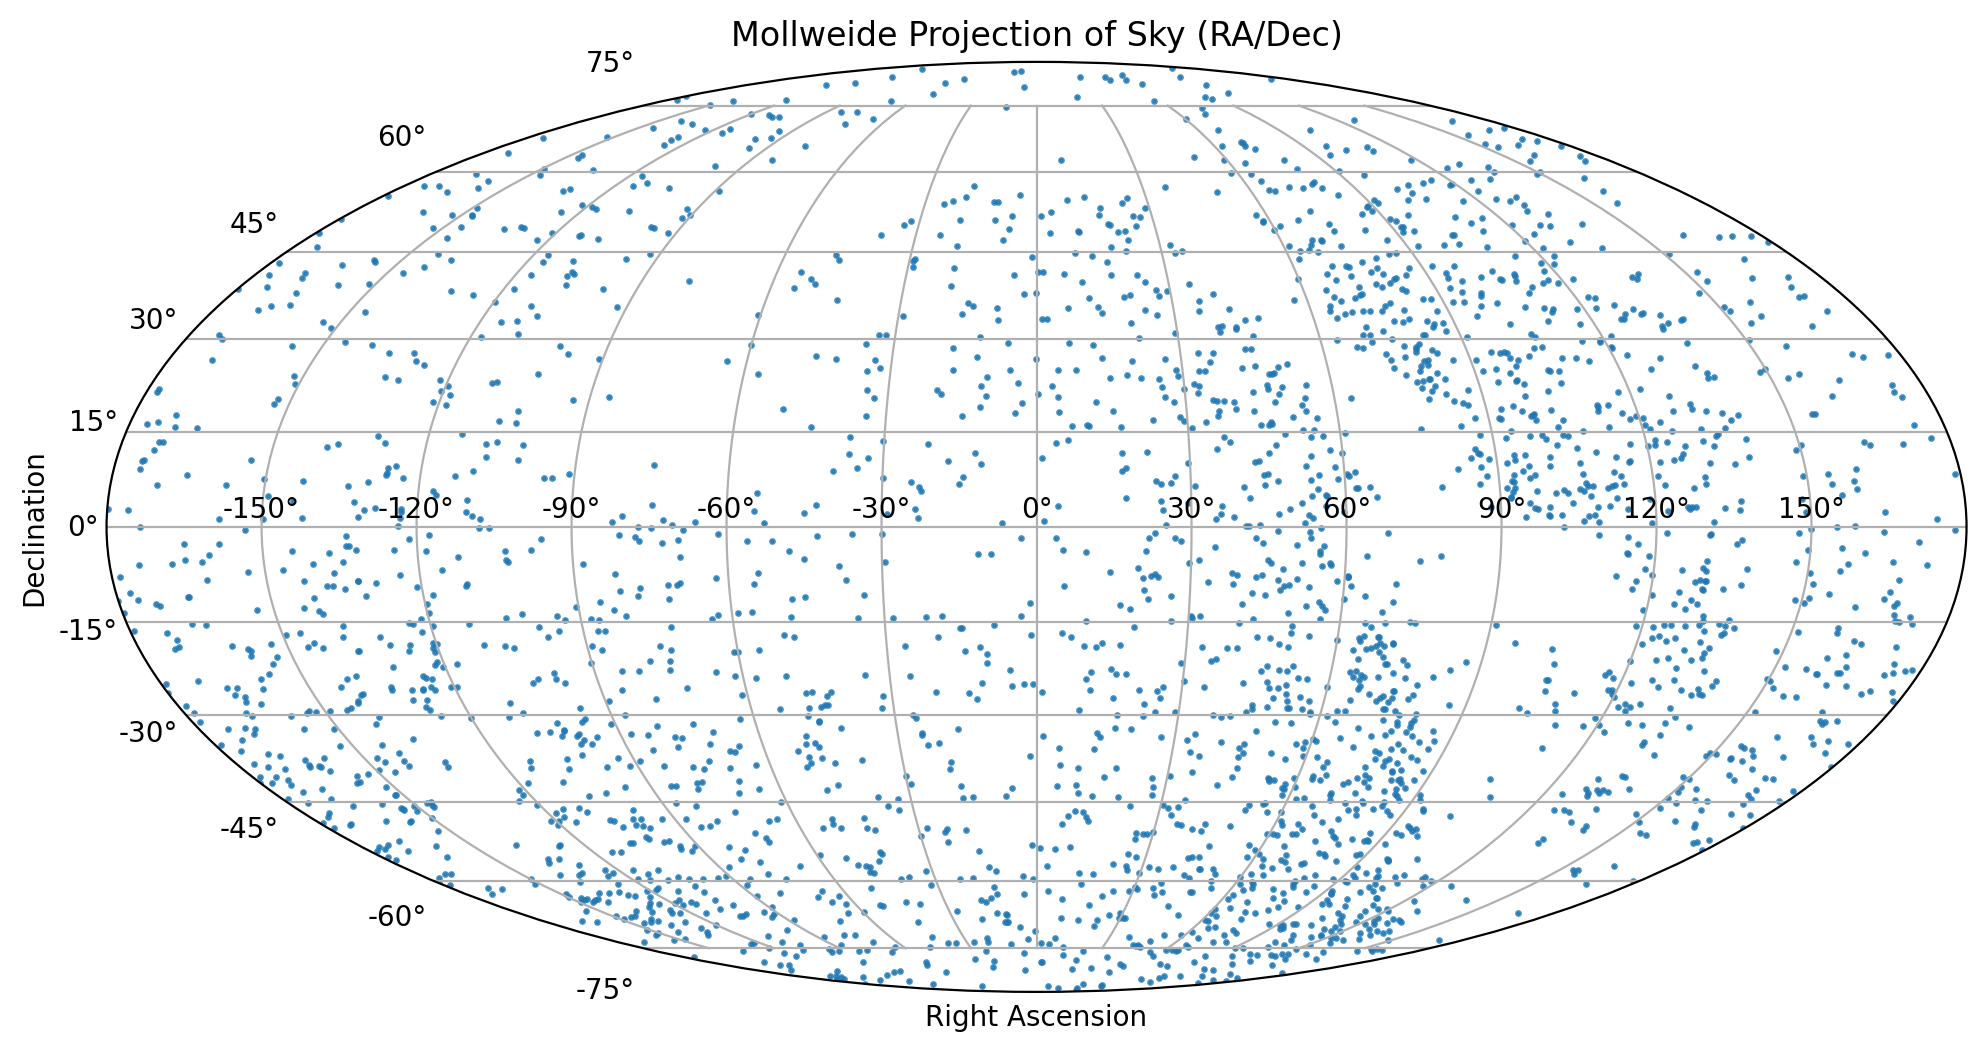

In [58]:
ra = np.radians(filtered_rr['VSX_RA'].values)
dec = np.radians(filtered_rr['VSX_Dec'].values)

# Shift RA from [0, 2π] to [-π, π] for Mollweide projection
ra = np.remainder(ra + 2*np.pi, 2*np.pi)  # Ensure RA is in [0, 2π]
ra[ra > np.pi] -= 2*np.pi  # Shift to [-π, π]
ra = -ra  # Flip RA for sky view (East left)

# Create Mollweide plot
fig = plt.figure(figsize=(12, 8), dpi=200)
ax = fig.add_subplot(111, projection='mollweide')

ax.scatter(ra, dec, s=2, alpha=0.8)

# Add grid and labels
ax.grid(True)
ax.set_xlabel('Right Ascension')
ax.set_ylabel('Declination')
ax.set_title('Mollweide Projection of Sky (RA/Dec)')

plt.show()